In [48]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import torch
import warnings
warnings.filterwarnings("ignore")

In [49]:
!pip show statsmodels

Name: statsmodels
Version: 0.13.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /Users/khalidalnahyan/opt/anaconda3/lib/python3.9/site-packages
Requires: numpy, patsy, scipy, packaging, pandas
Required-by: ThymeBoost, statsforecast, sktime, pyod, pmdarima, darts, arimafd


In [51]:
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [52]:
x=0.5*math.pi
math.sin(x)+math.cos(x)

1.0

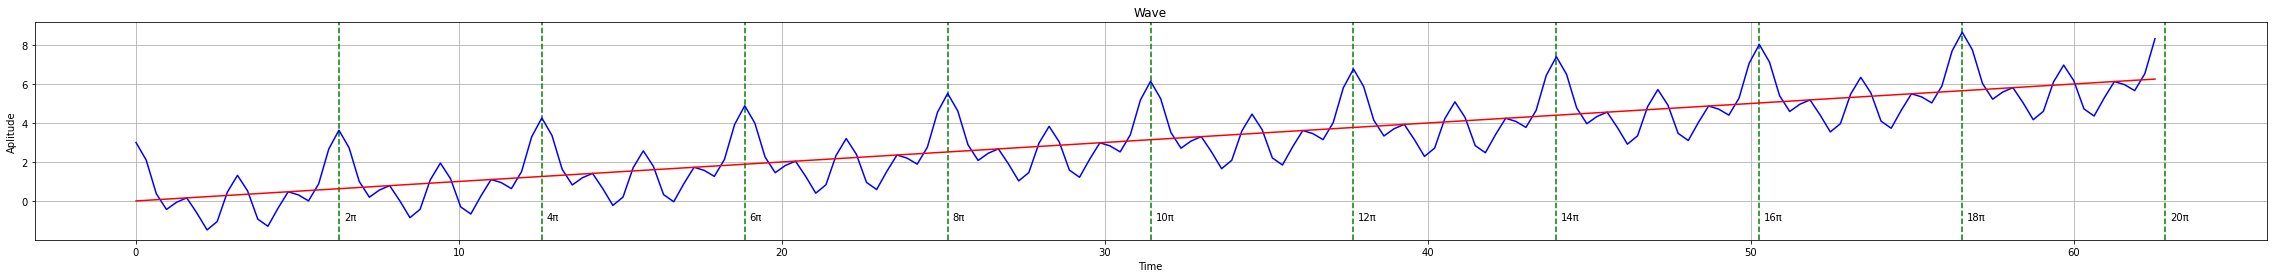

In [76]:
start=0
end=20*math.pi
inc=0.1*math.pi

time=np.arange(start,end,inc)
data=np.cos(time)+np.cos(2*time)+np.cos(4*time)+0.1*pow(time,1)
data2=0.1*time

plt.figure(figsize=(40,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude')
plt.grid(True, which='both')
plt.axvline(x=2*math.pi, color='green', linestyle='--')
plt.annotate("2π", (2*math.pi+0.15, -1))
plt.axvline(x=4*math.pi, color='green', linestyle='--')
plt.annotate("4π", (4*math.pi+0.15, -1))
plt.axvline(x=6*math.pi, color='green', linestyle='--')
plt.annotate("6π", (6*math.pi+0.15, -1))
plt.axvline(x=8*math.pi, color='green', linestyle='--')
plt.annotate("8π", (8*math.pi+0.15, -1))
plt.axvline(x=10*math.pi, color='green', linestyle='--')
plt.annotate("10π", (10*math.pi+0.15, -1))
plt.axvline(x=12*math.pi, color='green', linestyle='--')
plt.annotate("12π", (12*math.pi+0.15, -1))
plt.axvline(x=14*math.pi, color='green', linestyle='--')
plt.annotate("14π", (14*math.pi+0.15, -1))
plt.axvline(x=16*math.pi, color='green', linestyle='--')
plt.annotate("16π", (16*math.pi+0.15, -1))
plt.axvline(x=18*math.pi, color='green', linestyle='--')
plt.annotate("18π", (18*math.pi+0.15, -1))
plt.axvline(x=20*math.pi, color='green', linestyle='--')
plt.annotate("20π", (20*math.pi+0.15, -1))

plt.plot(time, data, color='blue')
plt.plot(time, data2, color='red')

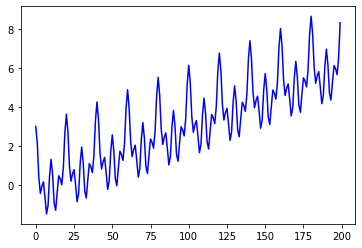

In [77]:
plt.plot(data[0:699], color='blue')

In [78]:
x = {'time': time, 'amplitude': data}
df = pd.DataFrame(data=x)
print(f"This dataset has {len(df)} datasets")
df.head(10)

This dataset has 200 datasets


,time,amplitude
0,0.000000,3.000000
1,0.314159,2.100506
2,0.628319,0.371849
3,0.942478,-0.436001
4,1.256637,-0.065319
5,1.570796,0.157080
6,1.884956,-0.620521
7,2.199115,-1.485908
8,2.513274,-1.057690
9,2.827433,0.449721


In [79]:
first_diff = df['amplitude'].diff()[1:]

In [80]:
first_diff

1     -0.899494
2     -1.728658
3     -0.807850
4      0.370682
5      0.222399
         ...   
195    0.840433
196   -0.159567
197   -0.307850
198    0.870682
199    1.791489
Name: amplitude, Length: 199, dtype: float64

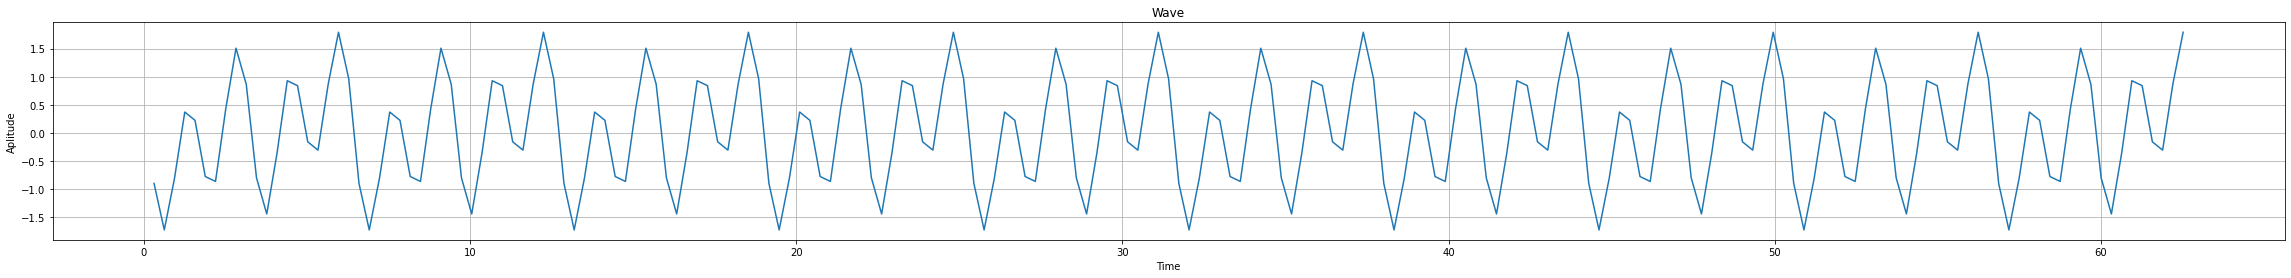

In [81]:
new_time=time[1:]

plt.figure(figsize=(40,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude')
plt.grid(True, which='both')
plt.plot(new_time,first_diff)

In [82]:
used_dataset = first_diff 
used_dataset

1     -0.899494
2     -1.728658
3     -0.807850
4      0.370682
5      0.222399
         ...   
195    0.840433
196   -0.159567
197   -0.307850
198    0.870682
199    1.791489
Name: amplitude, Length: 199, dtype: float64

In [83]:
acf_vals.shape

(20,)

<BarContainer object of 20 artists>

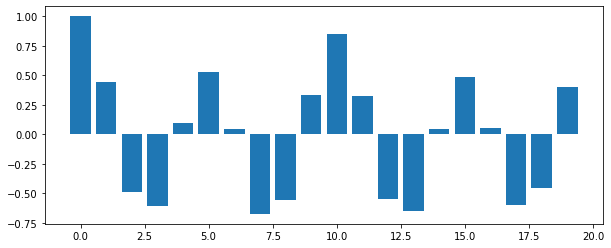

In [84]:
plt.figure(figsize=(10,4))
acf_vals = acf(used_dataset)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

In [85]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plt.figure(figsize=(20,10))
# plot_acf(used_dataset)
# plt.show()

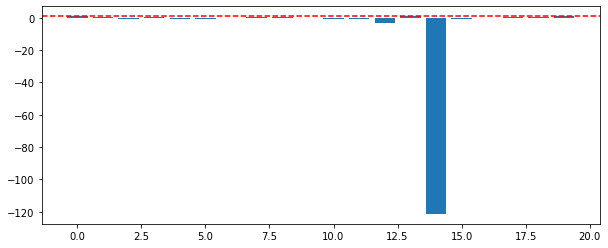

In [86]:
plt.figure(figsize=(10,4))
pacf_vals = pacf(used_dataset)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.axhline(y=1, color='red', linestyle='--')

p is 0 since it has no significant positive spikes
d is 15 from the first difference
q is 26 significant negative spikes
P is 9 since it has a significant positive spike
D is 2 from the first seasonal difference
Q is 23 significant negative seasonal spikes
m is 23 from the seasonal analysis


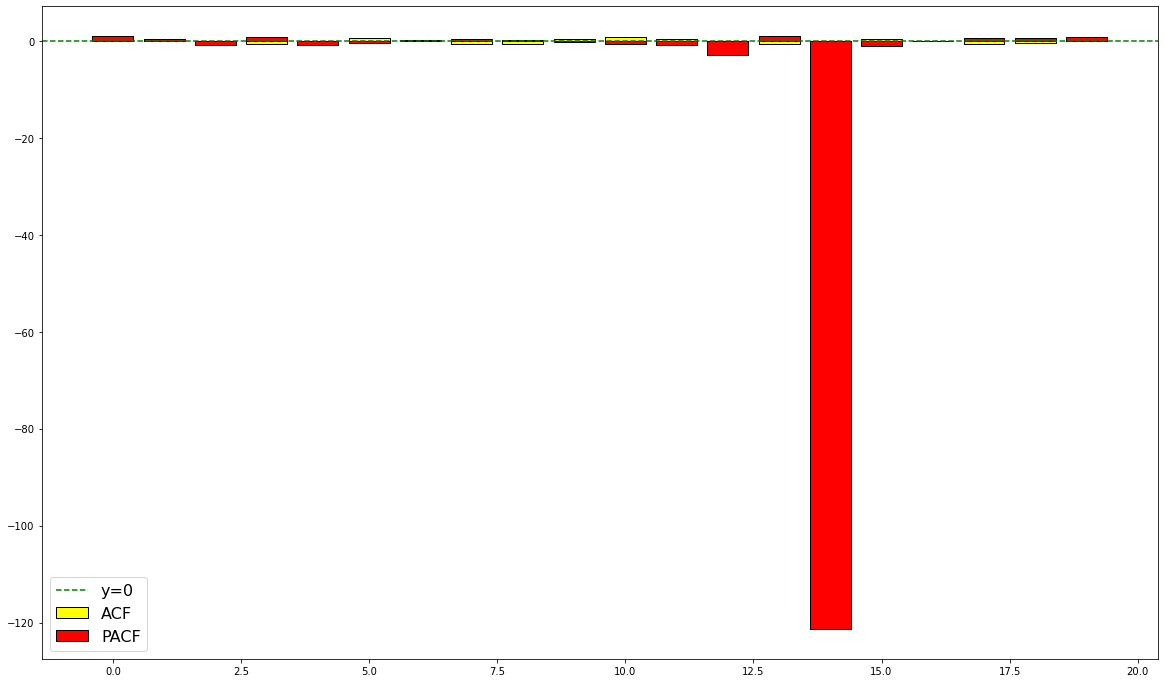

In [87]:
plt.figure(figsize=(20,12))
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags], color='yellow', edgecolor='black')
plt.bar(range(num_lags), pacf_vals[:num_lags], color='red' , edgecolor='black')
plt.axhline(y=0, color='green', linestyle='--')

plt.legend(('y=0', 'ACF', 'PACF'), fontsize=16)

print("p is 0 since it has no significant positive spikes")
print("d is 15 from the first difference")
print("q is 26 significant negative spikes")
print("P is 9 since it has a significant positive spike")
print("D is 2 from the first seasonal difference")
print("Q is 23 significant negative seasonal spikes")
print("m is 23 from the seasonal analysis")

In [88]:
# plt.figure(figsize=(20,10))
# plot_pacf(used_dataset)
# plt.show()

In [89]:
percent_test=80
percent_test=percent_test/100

time=new_time
time_point=time[round(len(used_dataset)*percent_test)]
time_point

train, test = used_dataset.loc[new_time <= time_point], used_dataset.loc[new_time > time_point]

print(f"Number of Training Data: {train.shape[0]}")
print(f"Number of Testing Data: {test.shape[0]}")

Number of Training Data: 160
Number of Testing Data: 39


In [90]:
order = (0,1,0)
seasonal_order = (1, 0, 1, 10)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.99558D-01    |proj g|=  1.22341D+00

At iterate    5    f= -4.89637D-01    |proj g|=  2.17988D-01

At iterate   10    f= -5.02035D-01    |proj g|=  7.04477D-01

At iterate   15    f= -6.71392D-01    |proj g|=  7.34724D-01

At iterate   20    f= -8.88956D-01    |proj g|=  7.50053D-01

At iterate   25    f= -9.47510D-01    |proj g|=  7.28086D-01

At iterate   30    f= -9.50237D-01    |proj g|=  2.32180D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     97      2     0     0   8.073D-03  -9.502D-01
  F = -0.95023795105665854     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                      SARIMAX Results                                       
Dep. Variable:                            amplitude   No. Observations:                  160
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 10)   Log Likelihood                 152.038
Date:                              Mon, 22 Aug 2022   AIC                           -298.076
Time:                                      13:26:21


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [91]:
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions

Text(0, 0.5, 'Error')

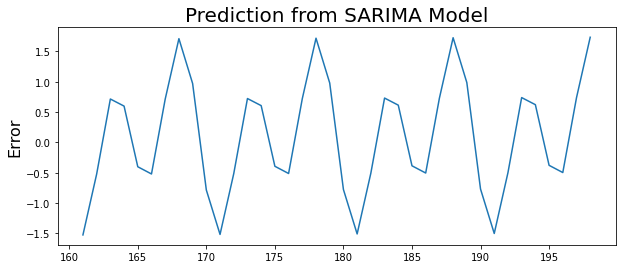

In [92]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Prediction from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Error')

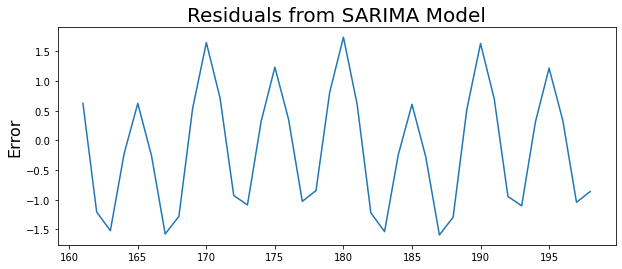

In [93]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

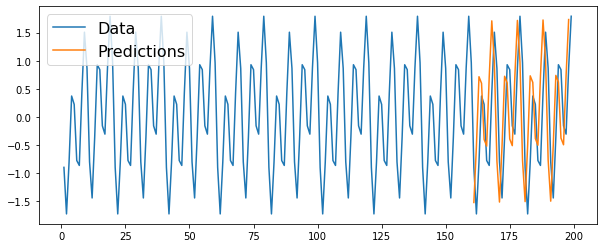

In [94]:
plt.figure(figsize=(10,4))

plt.plot(first_diff)
plt.plot(predictions)
#plt.plot(residuals)

plt.legend(('Data', 'Predictions', 'Residuals'), fontsize=16)

In [74]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test)),4))

Mean Absolute Percent Error: 3.7641


In [75]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 3.281657884432675


# Using the Rolling Forecast Origin